In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("data/train.csv")

In [9]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [10]:
import seaborn as sns

In [11]:
names = df.columns.tolist()

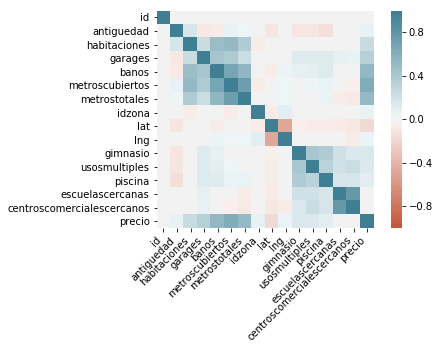

In [12]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
df['preciometro2'] = df.precio / df.metrostotales

In [21]:
recorte = df.loc[:,['tipodepropiedad','preciometro2','garages','gimnasio','usosmultiples','piscina','escuelascercanas','centroscomercialescercanos']]

In [92]:
from matplotlib import cm

color = cm.inferno_r(np.linspace(.4,.8, 10))

Text(0, 0.5, '')

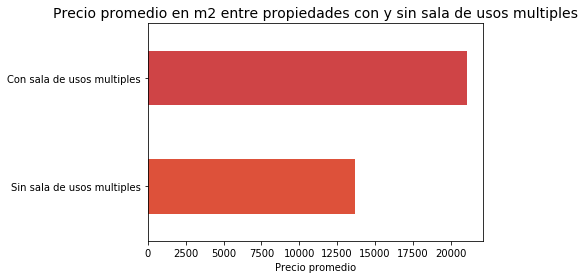

In [124]:
plot = recorte.groupby(recorte.usosmultiples)['preciometro2'].mean().plot(kind='barh',color=color)
plot.set_yticklabels(['Sin sala de usos multiples','Con sala de usos multiples'])
plot.set_title('Precio promedio en m2 entre propiedades con y sin sala de usos multiples',fontsize = 14)
plot.set_xlabel('Precio promedio')
plot.set_ylabel('')

In [103]:
recorte.groupby(recorte.usosmultiples)['preciometro2'].mean().pct_change()

usosmultiples
0.0         NaN
1.0    0.538918
Name: preciometro2, dtype: float64

###### Claramente se ve que el precio por m2 de una propiedad que alberga una sala de usos multiples hace que tenga un mayor impacto en su precio, que en promedio es de hasta un 53% mayor.

Text(0, 0.5, '')

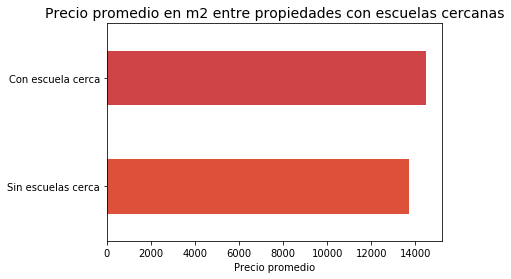

In [122]:
plot = recorte.groupby(recorte.escuelascercanas)['preciometro2'].mean().plot(kind='barh',color=color)
plot.set_yticklabels(['Sin escuelas cerca','Con escuela cerca'])
plot.set_xlabel('Precio promedio')
plot.set_title('Precio promedio en m2 entre propiedades con escuelas cercanas',fontsize = 14)
plot.set_ylabel('')

In [108]:
recorte.groupby(recorte.escuelascercanas)['preciometro2'].mean().pct_change()

escuelascercanas
0.0         NaN
1.0    0.056029
Name: preciometro2, dtype: float64

##### En este caso, tener una escuela cerca de la propiedad tiene una ingerencia del 0.05% en su precio promedio por m2.

Text(0, 0.5, '')

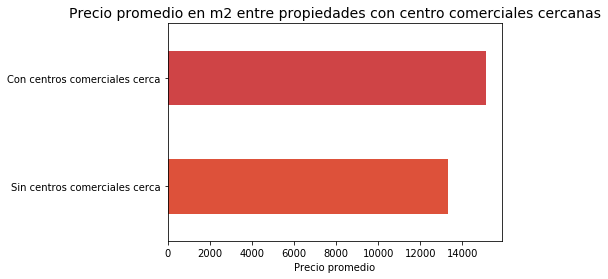

In [121]:
plot = recorte.groupby(recorte.centroscomercialescercanos)['preciometro2'].mean().plot(kind='barh',color=color)
plot.set_yticklabels(['Sin centros comerciales cerca','Con centros comerciales cerca'])
plot.set_xlabel('Precio promedio')
plot.set_title('Precio promedio en m2 entre propiedades con centro comerciales cercanas',fontsize = 14)
plot.set_ylabel('')

In [115]:
recorte.groupby(recorte.centroscomercialescercanos)['preciometro2'].mean().pct_change()

centroscomercialescercanos
0.0       NaN
1.0    0.1377
Name: preciometro2, dtype: float64

#### En el caso de los centros comerciales cercanos, el valor del m2 aumenta en un 13% con respecto a los que no tienen un centro comercial cerca (Una suposición válida es que tener un centro comercial cerca revaloriza una propiedad de manera positiva)

Text(0, 0.5, '')

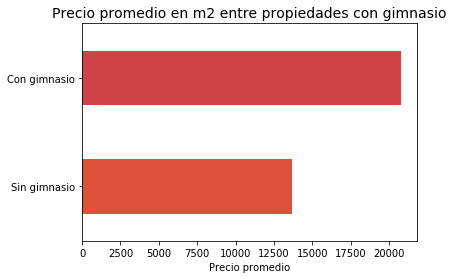

In [120]:
plot = recorte.groupby(recorte.gimnasio)['preciometro2'].mean().plot(kind='barh',color=color)
plot.set_title('Precio promedio en m2 entre propiedades con gimnasio',fontsize = 14)
plot.set_yticklabels(['Sin gimnasio','Con gimnasio'])
plot.set_xlabel('Precio promedio')
plot.set_ylabel('')

In [117]:
recorte.groupby(recorte.gimnasio)['preciometro2'].mean().pct_change()

gimnasio
0.0         NaN
1.0    0.521208
Name: preciometro2, dtype: float64

#### Los gimnasios por su parte, son una utilidad que le sube de manera significativa al precio promedio de los m2 en una propiedad que los contiene (llegando a un 57% más caro).

Text(0, 0.5, 'Cantidad de garages')

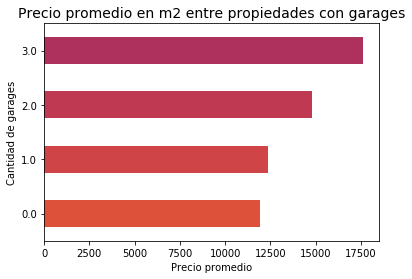

In [126]:
plot = recorte.groupby(recorte.garages)['preciometro2'].mean().plot(kind='barh',color=color)
plot.set_title('Precio promedio en m2 entre propiedades con garages',fontsize = 14)
#plot.set_yticklabels(['Sin gimnasio','Con gimnasio'])
plot.set_xlabel('Precio promedio')
plot.set_ylabel('Cantidad de garages')

In [127]:
recorte.groupby(recorte.garages)['preciometro2'].mean().pct_change()

garages
0.0         NaN
1.0    0.038474
2.0    0.196724
3.0    0.189882
Name: preciometro2, dtype: float64

#### Se puede notar claramente que, mientras más garages tenga una propiedad, más caro es su precio por m2. Llegando en un promedio de casi 20% más caro que una propiedad sin garage.
#### Otro dato a destacar es que se vé que el precio apenas tiene diferencia de 3% entre una propiedad con un garage o sin garage. Dando por sentado qu

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 24 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240